In [16]:
!pip freeze

asttokens==2.4.1
catboost==1.2.5
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
exceptiongroup==1.2.2
executing==2.0.1
fonttools==4.53.1
graphviz==0.20.3
ipykernel==6.29.5
ipython==8.26.0
jedi==0.19.1
joblib==1.4.2
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.5
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==1.26.0
packaging==24.1
pandas==2.2.2
parso==0.8.4
pexpect==4.9.0
pillow==10.4.0
platformdirs==4.2.2
plotly==5.23.0
prompt_toolkit==3.0.47
psutil==6.0.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
pytz==2024.1
pyzmq==26.1.0
scikit-learn==1.5.1
scipy==1.14.0
six==1.16.0
stack-data==0.6.3
tenacity==9.0.0
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.1
wcwidth==0.2.13


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
t_names = data['target_names']
targets = data['target']
named_targets = [t_names[t] for t in targets]
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = named_targets
df['species code'] = targets
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Data Exploration

Since we are dealing with plant measurements, I want to understand the natural size limitations of each of the 4 measurements

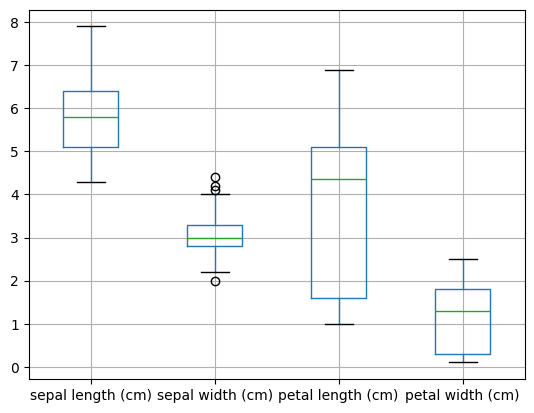

In [2]:
boxplot = df.boxplot(column=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"])

Based on the data, I am going to set the maximums for each fields pretty far away from what the max observed data is. Enforcing these maximums will prevent future inference on nonsense values\

Sepal Length (cm): 2 to 11 cm
Sepal Width (cm): 0.5 to 6 cm
Petal Length (cm): 0 to 10 cm
Petal Width (cm): 0 to 4 cm